# <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf.html">Математическая статистика (ФБМФ, ФМХФ)</a>
## Домашнее задание 2

**Правила:**

* Решения задач нужно отправить через <a target="_blank" href="https://forms.gle/Em5zUeLcUH4hSntRA">форму</a>. Если ответ пришел, придет ответ от автоответчика. Изменять решения до дедлайна можно по кнопке "изменить ответ", которая находится в письме от автоответчика.
* Дедлайн **10 мая 23:59**. После дедлайна работы не принимаются **вообще никак**, кроме случаев наличия уважительной причины. Даже если форма еще открыта, что делается для сдающих позже по уважительной причине.
* Любую уважительную причину нужно подтвердить документально, прикрепив скан или фото в форму.
* **По задачам 1-2** необходимо отправить фото в хорошем качестве (почерк, масштаб, освещенность, ориентация и т.д.). Фото плохого качества могут быть проигнорированы. **Каждую задачу необходимо отправить отдельной фотографией без посторонних записей.**
* **По задачам 3-6** необходимо отправить ноутбук с **выполненным кодом**.
* Выполнять задание необходимо **полностью самостоятельно**. При обнаружении списывания **все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Простой или основной уровень вы выбираете самостоятельно, выполняя или не выполняя задания типа B. При выборе **простого уровня** достаточно выполнить задания *типа A*. При выборе **основного уровня** нужно выполнять *как задания типа A, так и задания типа B*.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Никакой код из данного задания при проверке запускаться не будет. **Если код студента не выполнен, недописан и т.д., то он не оценивается.**
* Каждая задача стоит **5 баллов**.

In [48]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Задачи типа A (достаточно на "хор")

---

### Задача 1

Пусть $X_1, ..., X_n$&mdash; выборка пуассоновского распределения $Pois(\theta)$, то есть $\mathsf{P}(X_i = k) = \frac{\theta^k}{k!} e^{-\theta}$ при $k \in \{0, 1, 2, ...\}$. 
* Найдите асимптотически нормальную оценку $\theta$;
* Постройте асимптотический доверительный интервал на $\theta$.


-----

### Задача 2
Дана выборка $X_1, ..., X_n$ из распределения Лапласа с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$. Найдите асимптотический доверительный интервал для параметра $\theta$.

-----


### Задача 3
В этой задаче нужно визуализировать *свойство асимптотической нормальности*. Посмотрите также на <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">этот ноутбук</a>.

*a).* Пусть $X_1, ..., X_n$&mdash; выборка из распределения $U(0, 1)$. Согласно центральной предельной теореме оценка $\widehat{\theta} = 2\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$.  Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n = \sqrt{n} \left( 2\overline{X} - \theta \right)$ в зависимости от размера набора. 

<a href="https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html">Сгенерируйте</a> множество выборок $X^1, \dots, X^{300}$ из распределения $U[0, 1]$:  $\; X^j = (X^j_1, \dots, X^j_{500}), 1 \leq j \leq 300$.<br> 
По каждой из них <a href="https://mipt-stats.gitlab.io/courses/python/05_numpy.html#2.1-Математические-операции">посчитайте</a> оценки  $\widehat{\theta}_{jn} = 2\frac{X^j_1 + \dots + X^j_n}{n}$ для $1 \leq n \leq 500$,  то есть оценку параметра $\theta$ по первым $n$ наблюдениям $j$-й выборки.
Для этих оценок посчитайте статистики $Z_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 1$.

In [3]:
data = [] # define data array
theta = [[0]*500 for i in range(300)] # define theta

for j in range(300):
    data.append(sps.uniform(loc=0, scale=1).rvs(size=500)) # append samples in global data array
    res = 0
    for n in range(500):
        res  += data[j][n]
        theta[j][n] = res/(n + 1) * 2 

Z = [[0]*500 for i in range(300)]
for j in range(300):
    for n in range(500):
        Z[j][n] = (theta[j][n] - 1) * n ** (0.5)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$ <a href="https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html">с помощью `plt.plot`</a>. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

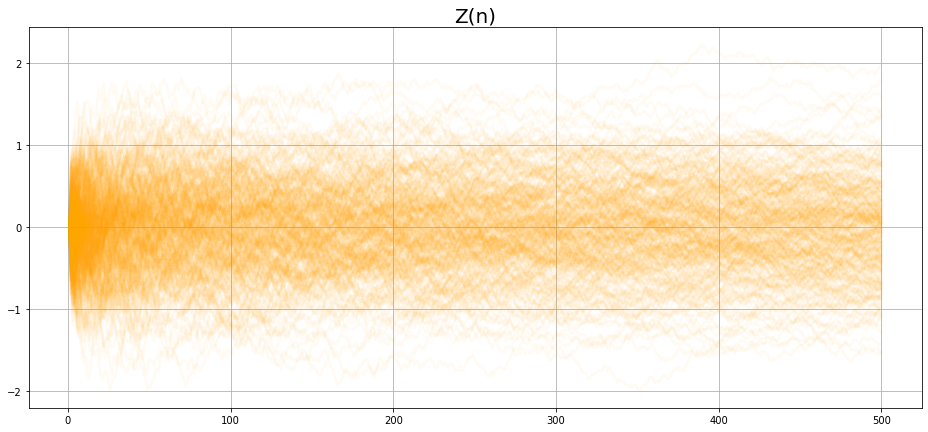

In [10]:
x = [i for i in range(1, 501)]
plt.figure(figsize=(16, 7))

for j in range(300):
    plt.plot(x, Z[j],  alpha = 0.05, color = 'orange', lw = 2.5)


plt.title('Z(n)', fontsize=20)

plt.grid(True)
plt.show()

Для $n=500$ по выборке $Z_{1,500}, ..., Z_{300,500}$ постройте <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lecture4_means.html#3.-Когда-придет-мой-автобус?-Или-каково-среднее-время-ожидания-автобуса.">гистограмму и график плотности</a> распределения $\mathcal{N}(0, 1)$.  Не забудьте сделать легенду.

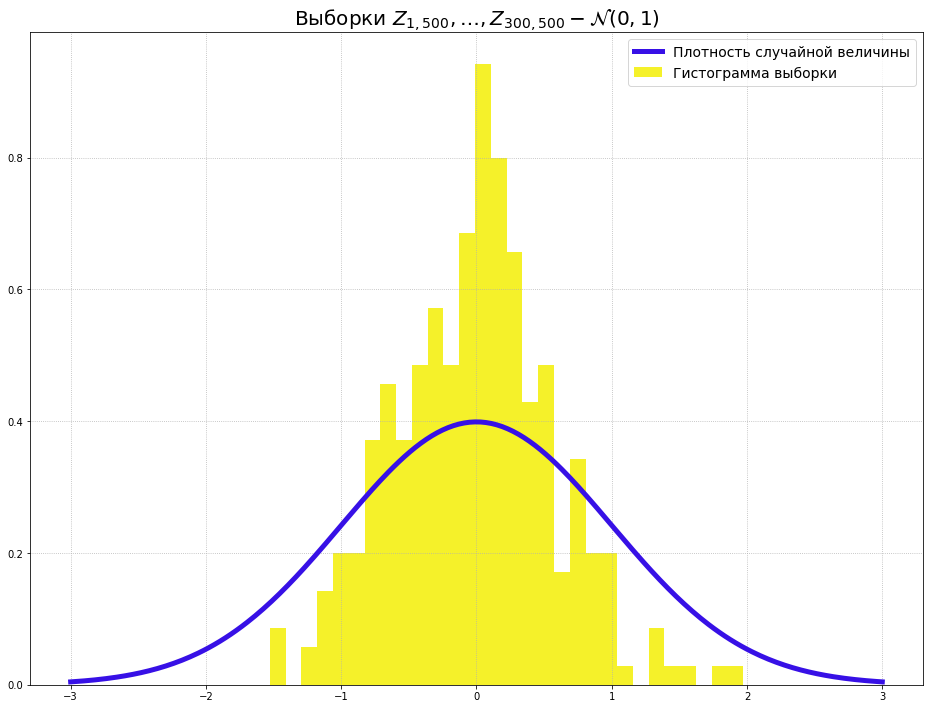

In [7]:
arr = []
for j in range(300):
    arr.append(Z[j][499])
    
grid = np.linspace(-3, 3, 300)  # grid for normal. graph

plt.figure(figsize = (16, 12))

plt.hist(arr, bins = 30, density = True, color = "#f5f12a", alpha = 1, label = 'Гистограмма выборки') 
plt.plot(grid, sps.norm.pdf(grid), color = "#3710e6", lw=5, label='Плотность случайной величины') 

plt.title(r'Выборки $Z_{1, 500}, \ldots ,Z_{300, 500}  -  \mathcal{N}(0, 1)$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

plt.show()

Сделайте вывод о смысле свойства асимптотической нормальности. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** 

Асимптотическая нормальность гарантирует состоятельность оценки;

показывает распределение оценки в пределе;

позволяет строить асимптотические доверительные интервалы. 

----

## Задачи типа B (необходимо на "отл")

----
### Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Пусть выборка $X_1, ... X_{100}$ имеет распределение $Bern(\theta)$. <a href="https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html">Сгенерируйте</a> такую выборку, взяв $\theta=1/2$. Для каждой подвыборке вида $X_1, ... X_i$, $1 \le i \le 100$ постройте асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha=0.95$. Формула для интервала была выведена на семинаре. Постройте график зависимости доверительного интервала от размера выборки (см. <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html">код с семинара</a>). 

Аналогичные действия выполните для выборки из распределения Лапласса с плотностью $p(x) = \frac{1}{2} e^{-|x-\theta|}$, сгенерировав выборку для $\theta=0$.

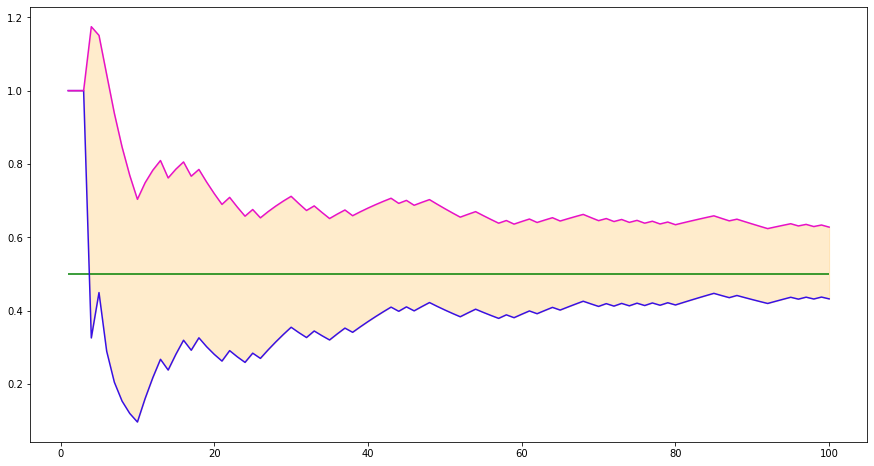

In [35]:
data = sps.bernoulli(0.5).rvs(size = 100)

a = 0.95

low_board = data.cumsum()/np.arange(1,101) - sps.norm.ppf((1 + a)/2) * (data.cumsum()/np.arange(1,101) * (1 - data.cumsum()/np.arange(1,101))) ** 0.5/(np.arange(1,101) ** 0.5)
up_board = data.cumsum()/np.arange(1,101) + sps.norm.ppf((1 + a)/2) * (data.cumsum()/np.arange(1,101) * (1 - data.cumsum()/np.arange(1,101))) ** 0.5/(np.arange(1,101) ** 0.5)


plt.figure(figsize = (15,8))
grid = np.arange(1,101)

plt.plot(grid, low_board, label = 'Нижняя граница', color = "#3710E6")
plt.plot(grid, up_board, label = 'Верхняя граница', color = "#e610c9")
plt.fill_between(grid, low_board, up_board, alpha = 0.2, color = "#ffa200")
plt.hlines(0.5 , 1, 100 , color = 'green')

plt.show()

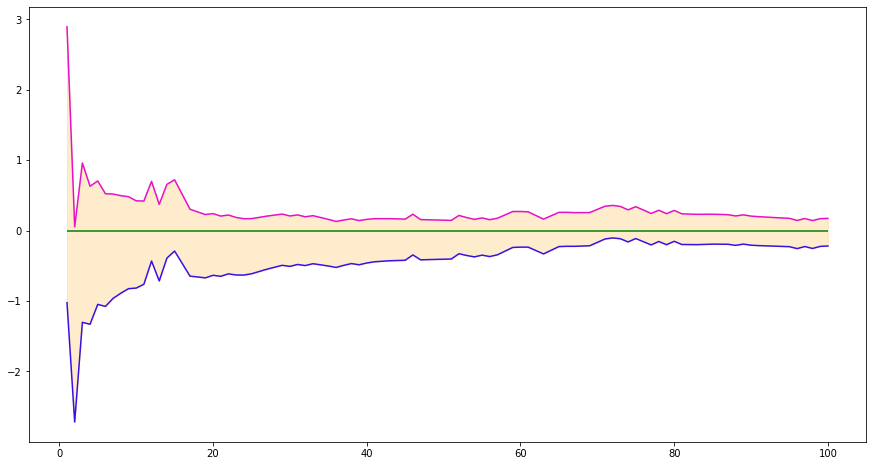

In [37]:
data = sps.laplace.rvs(size = 100)

a = 0.95

low_board = []
up_board = []

for i in range(1,101):
    low_board.append(np.median(data[:i]) - sps.norm.ppf((1 + a)/2)/(i ** 0.5))
    up_board.append(np.median(data[:i]) + sps.norm.ppf((1 + a)/2)/(i ** 0.5))

plt.figure(figsize = (15,8))
grid = np.arange(1,101)

plt.plot(grid, low_board, label = 'Нижняя граница', color = "#3710E6")
plt.plot(grid, up_board, label = 'Верхняя граница', color = "#e610c9")
plt.fill_between(grid, low_board, up_board, alpha = 0.2, color = "#ffa200")
plt.hlines(0, 1, 100 , color = 'green')

plt.show()

**Вывод:** 

Теория подтверждается: истинное значение оцениваемого параметра попадает в доверительные интервалы.

Однако доверительные интервалы, в силу асимптотичности, не работают при малых размерах выборки (n).

__________________
### Задача 5

Если у вас еще не установлена <a href="https://mipt-stats.gitlab.io/courses/python/09_seaborn.html">библиотека `seaborn`</a> для получения красивых графиков, поставьте ее.

In [38]:
import seaborn as sns
sns.set(font_scale = 1.2, palette = 'Set2')

Загрузим данные <a target="_blank" href="https://ru.wikipedia.org/wiki/Ирисы_Фишера">"Ирисы Фишера"</a> о цветках ириса различных сортов и посмотрим на первые пять строк таблицы. Для хранения данных используется класс <a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html#2.-Тип-данных-DataFrame">`DataFrame`</a> библиотеки <a href="https://mipt-stats.gitlab.io/courses/python/08_pandas1.html">`pandas`</a>.

In [39]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Столбцы отвечают за длину и ширину чашелистика и лепестка соответственно, а так же за тип цветка (setosa, virginica, versicolor).

Вектор значений первого столбца можно получить так

In [40]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

Первую строку можно получить так

In [41]:
df.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

Таблица с данными только по сорту virginica извлекается следующим образом

In [42]:
df[df['species'] == 'virginica']

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica


Визуализируем данные по двумерным проекциям. Цветом обозначен тип цветка.

/home/xenia/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
No handles with labels found to put in legend.


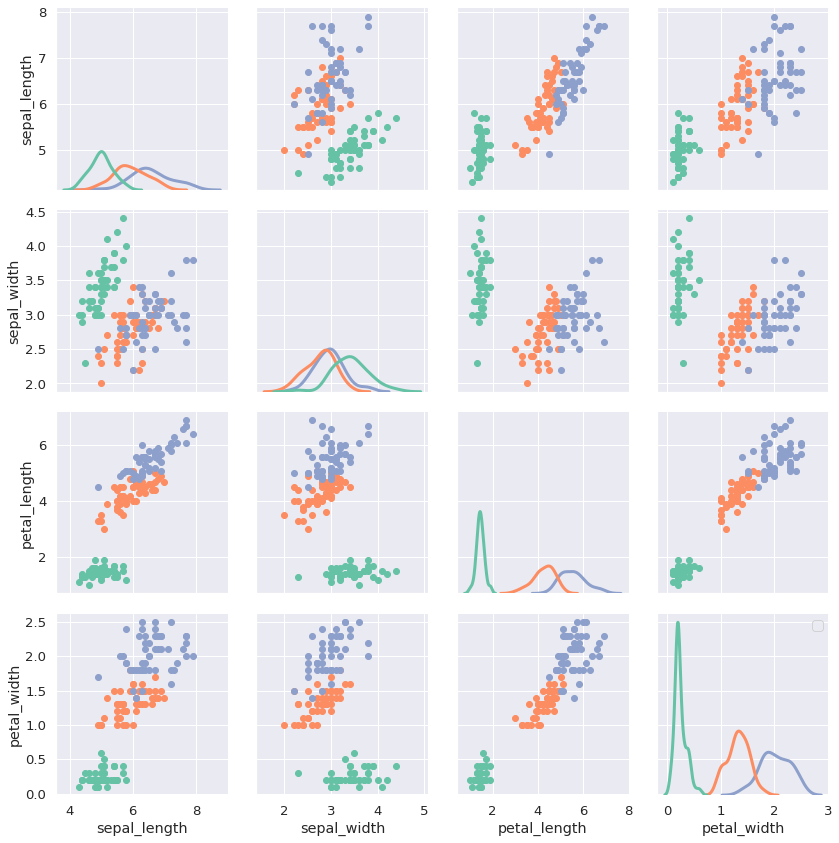

In [44]:
g = sns.PairGrid(df, hue = 'species', size = 3)
g.map_offdiag(plt.scatter, cmap = "Blues_d")
g.map_diag(sns.kdeplot, lw = 3)
plt.legend();

Для каждой характеристики цветка и каждого типа цветка проверьте с помощью <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#Критерий-Шапиро-Уилка">критерия Шапиро-Уилка</a>, является ли соответствующая выборка нормальной с уровнем значимости $\alpha=0.05$. Всего нужно совешить 12 проверок (4 характеристики, 3 типа). Например, нужно проверить, является ли выборка `df[df['species'] == 'virginica']['sepal_length']` нормальной.

In [49]:
data = []

for s in ['virginica', 'versicolor', 'setosa']:
    data.append([])
    tab = df[df['species'] == s]
    
    for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
        data[-1].append(sps.shapiro(tab[feature].to_numpy())[1])

data = np.array(data)

tab = pd.DataFrame(data.T, np.array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']), np.array(['virginica', 'versicolor', 'setosa']))
tab

,virginica,versicolor,setosa
sepal_length,0.258325,0.464733,4.595281e-01
sepal_width,0.180904,0.337989,2.715265e-01
petal_length,0.109774,0.158483,5.481044e-02
petal_width,0.086957,0.027278,8.658421e-07


Теперь для каждой характеристики для всех пар типов цветка проверьте с уровнем значимости $\alpha=0.05$, отличаются ли значения данной харатеристики для этих типов цветков. Если для обоих выборок нормальность выше не отверглась, используйте <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#T-критерий%20Стьюдента%20—%20независимые%20выборки">критерий Стьюдента</a>, иначе пользуйтесь <a href="https://mipt-stats.gitlab.io/courses/mathstat_bmhf/seminar3.html#Критерий-Смирнова">критерием Смирнова</a>. Например, нужно проверить, отличаются ли распределения выборкок `df[df['species'] == 'setosa']['sepal_length']` и `df[df['species'] == 'virginica']['sepal_length']`.

*Замечание*. Для применения критерия Стьюдента было бы правильнее предварительно проверить, что дисперсии выборок совпадает, но в данном задании это можно не делать.

In [52]:
s = ['Для признака ', ' у ирисов ', ' распределения, скорее всего, ', ' совпадают', ' не совпадают']

for feature in ['sepal_length', 'sepal_width', 'petal_length']:
    print(s[0] + feature + s[1] + 'virginica и setosa' + s[2] + s[3] * (sps.ttest_ind(df[df['species'] == 'virginica'][feature], df[df['species'] == 'setosa'][feature], equal_var=False)[1] > 0.05) + s[4] *(sps.ttest_ind(df[df['species'] == 'virginica'][feature], df[df['species'] == 'setosa'][feature], equal_var = False)[1] < 0.05))
    print(s[0] + feature + s[1] + 'versicolor и setosa' + s[2] + s[3] * (sps.ttest_ind(df[df['species'] == 'versicolor'][feature], df[df['species'] == 'setosa'][feature], equal_var=False)[1] > 0.05) + s[4] * (sps.ttest_ind(df[df['species'] == 'versicolor'][feature], df[df['species'] == 'setosa'][feature], equal_var = False)[1] < 0.05))
    print(s[0] + feature + s[1] + 'virginica и versicolor' + s[2] + s[3] * (sps.ttest_ind(df[df['species'] == 'virginica'][feature], df[df['species'] == 'versicolor'][feature], equal_var=False)[1] > 0.05) + s[4] * (sps.ttest_ind(df[df['species'] == 'virginica'][feature], df[df['species'] == 'versicolor'][feature], equal_var = False)[1] < 0.05))

print(s[0] + feature + s[1] + 'virginica и setosa' + s[2] + s[3] * (sps.ks_2samp(df[df['species'] == 'virginica'][feature], df[df['species'] == 'setosa'][feature])[1] > 0.05) + s[4] * (sps.ks_2samp(df[df['species'] == 'virginica'][feature], df[df['species'] == 'setosa'][feature])[1] < 0.05))
print(s[0] + feature + s[1] + 'versicolor и setosa' + s[2] + s[3] * (sps.ks_2samp(df[df['species'] == 'versicolor'][feature], df[df['species'] == 'setosa'][feature])[1] > 0.05) + s[4] * (sps.ks_2samp(df[df['species'] == 'versicolor'][feature], df[df['species'] == 'setosa'][feature])[1] < 0.05))
print(s[0] + feature + s[1] + 'virginica и versicolor' + s[2] + s[3] * (sps.ks_2samp(df[df['species'] == 'virginica'][feature], df[df['species'] == 'versicolor'][feature])[1] > 0.05) + s[4] * (sps.ks_2samp(df[df['species'] == 'virginica'][feature], df[df['species'] == 'versicolor'][feature])[1] < 0.05))

Для признака sepal_length у ирисов virginica и setosa распределения, скорее всего,  не совпадают
Для признака sepal_length у ирисов versicolor и setosa распределения, скорее всего,  не совпадают
Для признака sepal_length у ирисов virginica и versicolor распределения, скорее всего,  не совпадают
Для признака sepal_width у ирисов virginica и setosa распределения, скорее всего,  не совпадают
Для признака sepal_width у ирисов versicolor и setosa распределения, скорее всего,  не совпадают
Для признака sepal_width у ирисов virginica и versicolor распределения, скорее всего,  не совпадают
Для признака petal_length у ирисов virginica и setosa распределения, скорее всего,  не совпадают
Для признака petal_length у ирисов versicolor и setosa распределения, скорее всего,  не совпадают
Для признака petal_length у ирисов virginica и versicolor распределения, скорее всего,  не совпадают
Для признака petal_length у ирисов virginica и setosa распределения, скорее всего,  не совпадают
Для признака petal

<ipython-input-52-cd6607e1a2ac>:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(s[0] + feature + s[1] + 'virginica и setosa' + s[2] + s[3] * (sps.ttest_ind(df[df['species'] == 'virginica'][feature], df[df['species'] == 'setosa'][feature], equal_var=False)[1] > 0.05) + s[4] *(sps.ttest_ind(df[df['species'] == 'virginica'][feature], df[df['species'] == 'setosa'][feature], equal_var = False)[1] < 0.05))
<ipython-input-52-cd6607e1a2ac>:5: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(s[0] + feature + s[1] + 'versicolor и setosa' + s[2] + s[3] * (sps.ttest_ind(df[df['species'] == 'versicolor'][feature], df[df['species'] == 'setosa'][feature], equal_var=False)[1] > 0.05) + s[4] * (sps.ttest_ind(df[df['species'] == 'versicolor'][feature], df[df['species'] == 'setosa'][feature], equal_var = False)[1] < 0.05))
<ipython-input-52-cd6607e1a2ac>:6: DeprecationWarning:

**Вывод:** 

Критерий Шапиро-Уилка мы использовали для проверки нормальности распределния. Получено, что только 2 из 12 распределений  не являются нормальными на выбранном уровне значимости. 

Если же для указанных двух распределений применять критерий Смирнова, а для остальных - Стьюдента, получим несовпадение всех представленных распрееделений. Это согласуется с анализом визуализированных данных вначале.

__________________
### Задача 6

Сколько проверок статистических гипотез пришлось совершить в предыдущей задачи?

24

Каким числом ограничена вероятность ошибки первого рода в каждой проверке?

0.05

Такую ошибку мы могли совершить в каждой проверке. Вероятность совершения хотя бы одной ошибки первого рода среди всех проверок не превосходит произведения указанных вами чисел. Но нам хотелось бы, чтобы вероятность совершения хотя бы одной ошибки первого рода не превосходила $\alpha=0.05$. Можете ли вы предложить решение данной проблемы?

Подобную проблему можно решить с помощью множественной проверки гипотез. Есть несколько методов в scipy.stats. Я бы воспользовалась методом Бонферрони:

Уровень значимости $\alpha$ заменим на $\frac{\alpha}{n}$. Тогда вероятность совершения хотя бы одной ошибки не больше исходного $\alpha$.

Реализуйте этот способ для предыдущей задачи

In [55]:
from statsmodels.sandbox.stats.multicomp import multipletests

for method in ('bonferroni', 'sidak', 'holm-sidak', 'holm', 'fdr_bh', 'fdr_by'):
    pvals_corrected = multipletests(data.ravel(), alpha = 0.05, method = method)[1]
    reject = multipletests(data.ravel(), alpha = 0.05, method = method)[0]
    print(reject)


[False False False False False False False False False False False  True]
[False False False False False False False False False False False  True]
[False False False False False False False False False False False  True]
[False False False False False False False False False False False  True]
[False False False False False False False False False False False  True]
[False False False False False False False False False False False  True]


**Вывод:** 

Все методы множественной проверки дали один и тот же результат. Нормальность исключается только для признака petal_width у ириса setosa. В отличие от Задачи 5 после применения МПГ мы уже не исключаем нормальности того же признака для ириса versicolor.